In [11]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
wine = load_wine()
print(wine.DESCR)

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target
print(X)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=12345
)

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([47, 57, 38], dtype=int64))

In [10]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([12, 14, 10], dtype=int64))

In [12]:
ridge = RidgeClassifier(random_state=12345)

In [13]:
ridge.fit(x_train, y_train)

RidgeClassifier(random_state=12345)

점수를 비교했을때 test가 적으면 과적합의 확률이 높다

In [15]:
ada = AdaBoostClassifier(random_state=12345)
ada.fit(x_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=12345)

In [17]:
ada.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.24,
       0.24, 0.02])

In [18]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(X, y)
hdb = HDBSCAN(min_cluster_size=20)
hdb_pred = hdb.fit_predict(x_lda)

In [19]:
x_lda = pd.DataFrame(x_lda, columns=["1", "2"])
x_lda["y"] = y
x_lda["y_pred"] = hdb_pred

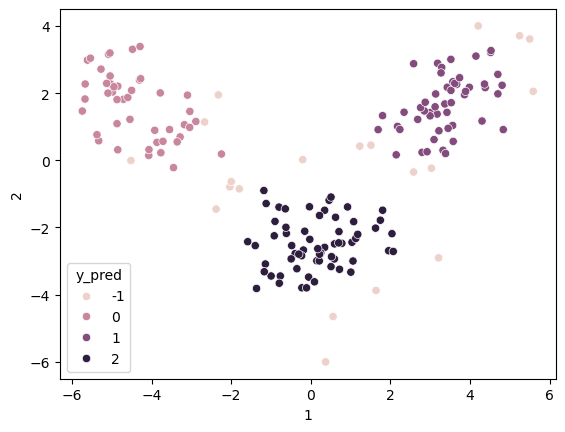

In [20]:
sns.scatterplot(data=x_lda, x="1", y="2", hue="y_pred")
plt.show()

여기서 -1에 해당하는 부분은 20개가 모이지도 않고 벗어나 있는 것으로 보아 아웃라이어라고 추측